In [67]:
import pandas as pd
import geopandas
from opt_funcs import optimise
from opt_funcs_p import optimise_parallel
import matplotlib.pyplot as plt

In [68]:
buildings_df = pd.read_csv("save_files/buildings_all_zones_df.csv")
grid_gdf = geopandas.read_file("save_files/grid_250.shp")
grid_intervals = 250

In [69]:
# res = optimise(n_fac=12,
#                n_iterations=5000,
#                buildings_df=buildings_df,
#                grid_gdf=grid_gdf,
#                grid_intervals=grid_intervals)


# vardict = {}
# obdict = {}
# for r in range(len(res.result)):
#     vardict[r] = res.result[r].variables
#     obdict[r] = res.result[r].objectives[:]
    
# pd.DataFrame(obdict).to_csv("save_files/ob_init.csv")
# pd.DataFrame(vardict).to_csv("save_files/var_init.csv")

In [70]:
saved_results_vars = pd.read_csv("save_files/nfe10000_10_NSGAII_NC/variables_nfe10000_10_NSGAII_NC.csv",index_col=0)
saved_results_obj = pd.read_csv("save_files/nfe10000_10_NSGAII_NC/objectives_nfe10000_10_NSGAII_NC.csv",index_col=0)

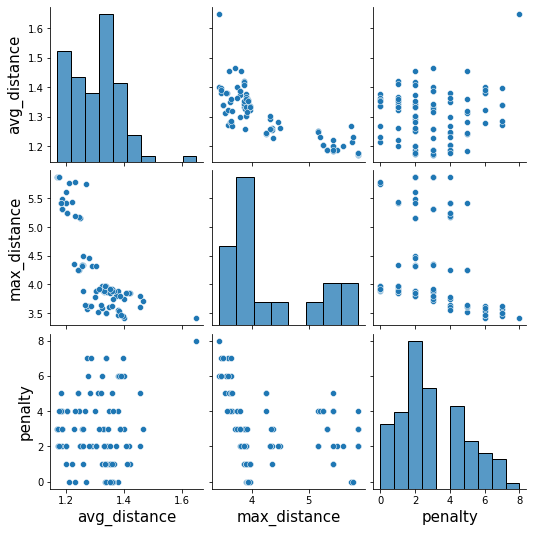

In [71]:
import seaborn
objectives = saved_results_obj.iloc[0:100,:]
variables = saved_results_vars.iloc[0:100,:]
objectives.columns = ["avg_distance","max_distance","penalty"]
seaborn.set_context( rc={"axes.labelsize":15})
pp = seaborn.pairplot(objectives)#raw_results.iloc[:,1:])
# pp.fig.suptitle("Pairplot: nfe10000_10_NSGAII_NC",y=1.03,size=25);

In [72]:
import plotly.express as px


fig = px.parallel_coordinates(objectives, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color="penalty",
                              color_continuous_scale=px.colors.diverging.Tealrose)
                              #color_continuous_midpoint=4.5,
#                               title="Parallel axis plot of found solutions")
fig.show()

In [7]:
objectives_0 = objectives[objectives.penalty==0]
variables_0 = variables[objectives.penalty==0]

fig = px.parallel_coordinates(objectives_0, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of policy options")
fig.show()

print(len(objectives_0))

11


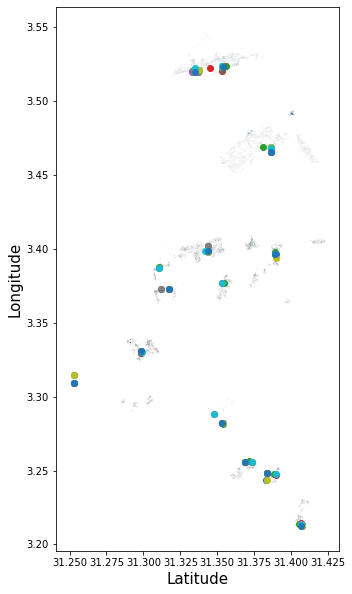

In [73]:
from shapely.geometry import Point, MultiPoint
import seaborn


# Create geodataframe
multipointlist = list()
for i in range(len(variables_0)):
    pointlist = list()
    for j in range(int(len(variables_0.iloc[i,:])/2.)):
        pointlist.append(Point(variables_0.iloc[i,j*2],variables_0.iloc[i,j*2+1]))
    multipointlist.append(MultiPoint(pointlist))

gdf_as_dict = {}
gdf_as_dict['avg_distance'] = objectives_0.avg_distance
gdf_as_dict['max_distance'] = objectives_0.max_distance
gdf_as_dict['geometry'] = multipointlist

gdf_0 = geopandas.GeoDataFrame(gdf_as_dict)


# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

for i in gdf_0.index:
    gdf_0.loc[[i],'geometry'].plot(ax=ax)
# plt.title("Pareto optimal locations\nwith penalty 0",fontsize=15)
plt.xlabel("Latitude");
plt.ylabel("Longitude");

In [9]:
objectives_0f = objectives_0[objectives_0.max_distance<4.2]
variables_0f = variables_0[objectives_0.max_distance<4.2]


fig = px.parallel_coordinates(objectives_0f, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of policy options")
fig.show()

Text(194.15648492473358, 0.5, 'Longitude')

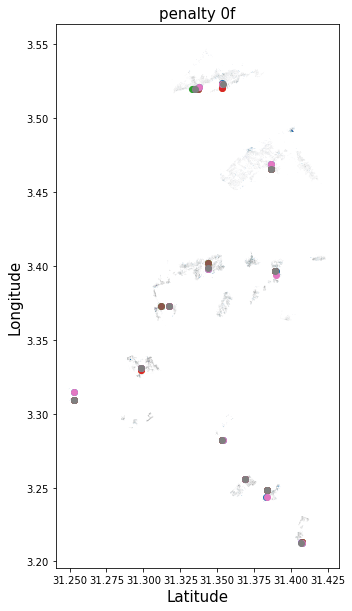

In [10]:
from shapely.geometry import Point, MultiPoint
import seaborn


# Create geodataframe
multipointlist = list()
for i in range(len(variables_0f)):
    pointlist = list()
    for j in range(int(len(variables_0f.iloc[i,:])/2.)):
        pointlist.append(Point(variables_0f.iloc[i,j*2],variables_0f.iloc[i,j*2+1]))
    multipointlist.append(MultiPoint(pointlist))

gdf_as_dict = {}
gdf_as_dict['avg_distance'] = objectives_0f.avg_distance
gdf_as_dict['max_distance'] = objectives_0f.max_distance
gdf_as_dict['geometry'] = multipointlist

gdf_0f = geopandas.GeoDataFrame(gdf_as_dict)


# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

for i in gdf_0f.index:
    gdf_0f.loc[[i],'geometry'].plot(ax=ax)
plt.title("penalty 0f",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [11]:
objectives_7 = objectives[objectives.penalty==7]
variables_7 = variables[objectives.penalty==7]

fig = px.parallel_coordinates(objectives_7, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of policy options")
fig.show()

print(len(objectives_7))

5


Text(180.7573703261893, 0.5, 'Longitude')

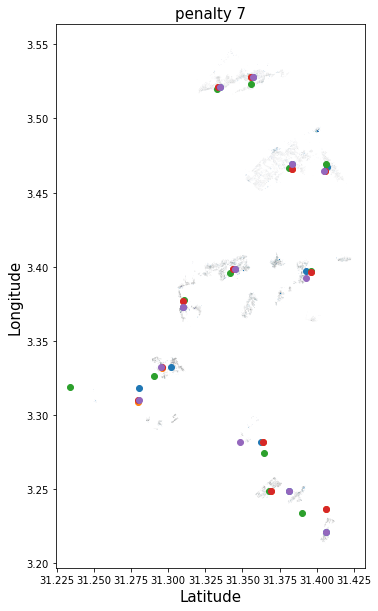

In [12]:
from shapely.geometry import Point, MultiPoint
import seaborn


# Create geodataframe
multipointlist = list()
for i in range(len(variables_7)):
    pointlist = list()
    for j in range(int(len(variables_7.iloc[i,:])/2.)):
        pointlist.append(Point(variables_7.iloc[i,j*2],variables_7.iloc[i,j*2+1]))
    multipointlist.append(MultiPoint(pointlist))

gdf_as_dict = {}
gdf_as_dict['avg_distance'] = objectives_7.avg_distance
gdf_as_dict['max_distance'] = objectives_7.max_distance
gdf_as_dict['geometry'] = multipointlist

gdf_7 = geopandas.GeoDataFrame(gdf_as_dict)

# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

for i in gdf_7.index:
    gdf_7.loc[[i],'geometry'].plot(ax=ax)
plt.title("penalty 7",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

Text(194.1400822626694, 0.5, 'Longitude')

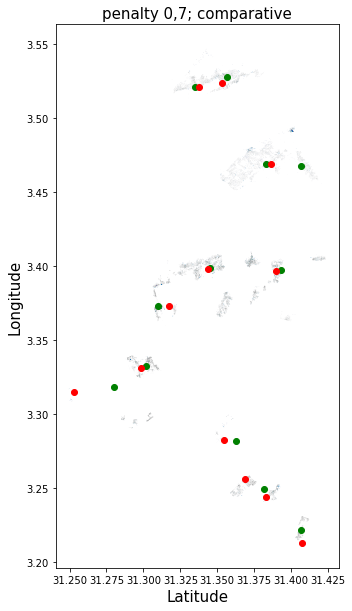

In [13]:
# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

i = gdf_7.index[0]
gdf_7.loc[[i],'geometry'].plot(ax=ax,color='green')
j = gdf_0.index[0]
gdf_0.loc[[j],'geometry'].plot(ax=ax,color='red')

plt.title("penalty 0,7; comparative",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [14]:
print("Average distance of proposed system is: ",gdf_0f.avg_distance[0],"\n","Maximal distance of proposed system is: ",gdf_0f.max_distance[0])

print("Number of buildings is: ",len(buildings))

Average distance of proposed system is:  1.3365156903980662 
 Maximal distance of proposed system is:  3.9672686018953103
Number of buildings is:  73192


In [15]:
import numpy as np
variables = variables_0f.iloc[0,:]
n_fac=12

import math

def compute_distance(lata,latb,lona,lonb):
        R = 6373

        lata = math.radians(lata)
        lona = math.radians(lona)
        latb = math.radians(latb)
        lonb = math.radians(lonb)

        dlat = lata-latb
        dlon = lona-lonb

        a = math.sin(dlat / 2)**2 + math.cos(lata) * math.cos(latb) * math.sin(dlon / 2)**2

        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        distance = R*c

        return distance

# Initialise and fill both container for x-y coords
fac_x_list = list() # x coords per facility
fac_y_list = list() # y coords per facility
for a in range(len(variables)):
    if a%2==0:
        fac_x_list.append(variables[a])
    else:
        fac_y_list.append(variables[a])

# Emtpy containers for ppl per facility, distance per building resp.
fac_nb = np.zeros(n_fac)
dist_b = np.zeros(len(buildings_df))

# Fill in the containers
for b in range(len(buildings_df)):

    b_x = buildings_df.x[b]
    b_y = buildings_df.y[b]
    min_distance = np.inf

    for f in range(len(fac_x_list)):
        fac_x = fac_x_list[f]
        fac_y = fac_y_list[f]

        # tmp_distance = np.sqrt( ( (b_x-fac_x)**2 + (b_y-fac_y)**2 ) )
        tmp_distance = compute_distance(b_x,fac_x,b_y,fac_y)

        if tmp_distance<min_distance:
            min_distance=tmp_distance
            closest_fac = f

        else:
            pass

    fac_nb[closest_fac] += 1
    dist_b[b] = min_distance
    
fac_nb = fac_nb*33249/len(buildings_df)

In [16]:
fac_nb

array([4086.62154334, 1944.2797027 , 4665.36274456, 2920.96226364,
       2034.2253525 , 6640.53287245, 2575.71633512, 1086.61613291,
       5966.39476992,   18.17083834,  234.40381462, 1075.7136299 ])

In [59]:
final_gdf_dict = {}
final_gdf_dict["fatm_id"] = list()
final_gdf_dict["size"] = list()
final_gdf_dict["plotsize"] = list()
final_gdf_dict["geometry"] = list()

final_gdf_dict_b = {}
final_gdf_dict_b["fatm_id"] = list()
final_gdf_dict_b["size"] = list()
final_gdf_dict_b["plotsize"] = list()
final_gdf_dict_b["geometry"] = list()

for p in range(len(gdf_0f.geometry[0])):
    final_gdf_dict["fatm_id"].append(p)
    final_gdf_dict["size"].append(fac_nb[p])
    final_gdf_dict["plotsize"].append(fac_nb[p]/3.)
    final_gdf_dict["geometry"].append(gdf_0f.geometry[0][p])
    
    if p != 8:
        final_gdf_dict_b["fatm_id"].append(p)
        final_gdf_dict_b["size"].append(fac_nb[p])
        final_gdf_dict_b["plotsize"].append(fac_nb[p]/3.)
        final_gdf_dict_b["geometry"].append(gdf_0f.geometry[0][p])
    
geopandas.GeoDataFrame(final_gdf_dict).to_file("save_files/gdf_0f/gdf_0f.shp")
geopandas.GeoDataFrame(final_gdf_dict_b).to_file("save_files/gdf_0f/gdf_0f_b.shp")


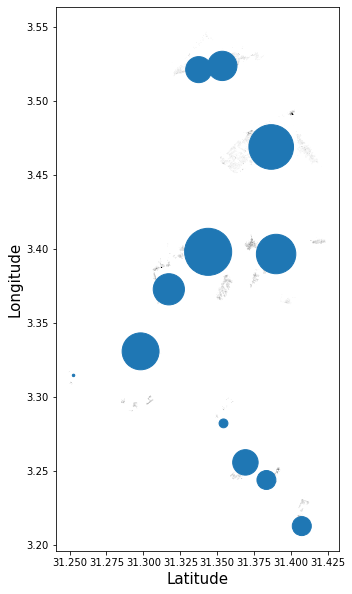

In [74]:
# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax,color='black')
geopandas.GeoDataFrame(final_gdf_dict).plot(ax=ax,markersize = final_gdf_dict['plotsize'])

# plt.title("Selected location\nwith markersize as criticality",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.savefig("save_files/gdf_0f/output.png")

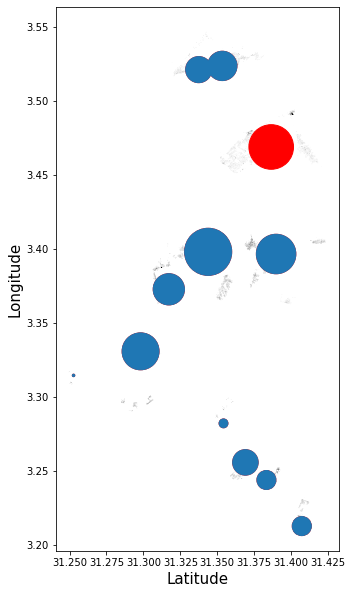

In [75]:
# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax,color='black')
geopandas.GeoDataFrame(final_gdf_dict).plot(ax=ax,markersize = final_gdf_dict['plotsize'],color='red')
geopandas.GeoDataFrame(final_gdf_dict_b).plot(ax=ax,markersize = final_gdf_dict_b['plotsize'])


# plt.title("Selected location\nwith markersize as criticality",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.savefig("save_files/gdf_0f/output.png")

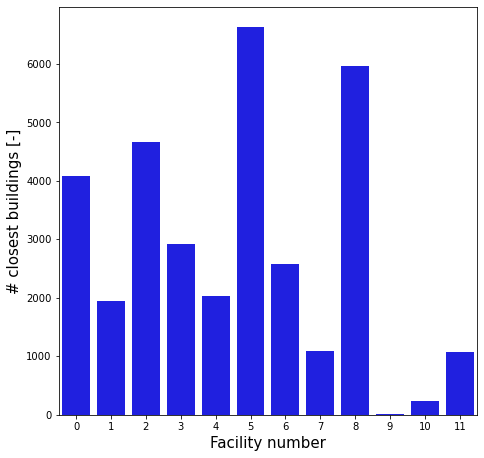

In [77]:
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(7.5,7.5))

seaborn.barplot(ax=ax,x=final_gdf_dict['fatm_id'],y=final_gdf_dict['size'],color='blue');
plt.ylabel("# closest buildings [-]");
plt.xlabel("Facility number");
# plt.title("Number of closest buildings\nper facility",fontsize=15);
